In [11]:
'''
creator.create()：
DEAP 提供的一个工厂函数，用于动态创建新的类。其基本语法为：

creator.create(class_name, base_class, attribute=value)

"FitnessMin"：
创建的类名称，表示这个类是用于最小化问题的适应度类。这个名字可以自定义，常用 FitnessMin 表示最小化，FitnessMax 表示最大化。

base.Fitness：
DEAP 提供的基础适应度类，表示个体的适应度评估标准。所有自定义的适应度类都继承自 base.Fitness。

weights=(-1.0,)：
适应度权重，表示优化方向：
-1.0：表示最小化问题，适用于需要找到目标函数最小值的场景。
1.0：表示最大化问题，适用于需要找到目标函数最大值的场景。
多目标优化：如果是多目标优化，可以传入多个权重，例如 weights=(-1.0, 1.0)，分别表示最小化第一个目标，最大化第二个目标。

#####################################################################################################################

creator.create("Individual", list, fitness=creator.FitnessMin)
定义一个新的个体类（Individual），继承自 Python 的 list，并绑定适应度属性 fitness，用于存储个体的适应度值。

"Individual"：
创建的类名称，表示遗传算法中的个体。每个个体表示一个解，通常是一个包含若干参数的列表。这个名字可以自定义，但 Individual 是惯用名称。
list：
Individual 类继承自 Python 的 list 类，意味着每个个体就是一个列表，列表中的元素表示优化问题的参数（或“基因”）。例如，如果我们优化一个变量 
x
x，个体可能是 [x]；如果是多变量优化，个体可能是 [x, y, z]。
fitness=creator.FitnessMin：
为 Individual 类绑定一个 fitness 属性，用于存储个体的适应度值。这个适应度类是我们在前一行定义的 FitnessMin，表示个体的好坏依据是目标函数的最小化结果。

'''

'\ncreator.create()：\nDEAP 提供的一个工厂函数，用于动态创建新的类。其基本语法为：\n\ncreator.create(class_name, base_class, attribute=value)\n\n"FitnessMin"：\n创建的类名称，表示这个类是用于最小化问题的适应度类。这个名字可以自定义，常用 FitnessMin 表示最小化，FitnessMax 表示最大化。\n\nbase.Fitness：\nDEAP 提供的基础适应度类，表示个体的适应度评估标准。所有自定义的适应度类都继承自 base.Fitness。\n\nweights=(-1.0,)：\n适应度权重，表示优化方向：\n-1.0：表示最小化问题，适用于需要找到目标函数最小值的场景。\n1.0：表示最大化问题，适用于需要找到目标函数最大值的场景。\n多目标优化：如果是多目标优化，可以传入多个权重，例如 weights=(-1.0, 1.0)，分别表示最小化第一个目标，最大化第二个目标。\n\n#####################################################################################################################\n\ncreator.create("Individual", list, fitness=creator.FitnessMin)\n定义一个新的个体类（Individual），继承自 Python 的 list，并绑定适应度属性 fitness，用于存储个体的适应度值。\n\n"Individual"：\n创建的类名称，表示遗传算法中的个体。每个个体表示一个解，通常是一个包含若干参数的列表。这个名字可以自定义，但 Individual 是惯用名称。\nlist：\nIndividual 类继承自 Python 的 list 类，意味着每个个体就是一个列表，列表中的元素表示优化问题的参数（或“基因”）。例如，如果我们优化一个变量 \nx\nx，个体可能是 [x]；如果是多变量优化，个体可能是 [x, y, z]。\nfitness=creator.FitnessMin：\n为 Individual 类绑定一个 fitness 属性，用于存储个

In [12]:
'''
1. toolbox = base.Toolbox()
创建一个 工具箱（toolbox）对象，用于注册遗传算法的各种操作，如基因初始化、个体生成、选择、交叉和变异等。


2. toolbox.register("attr_float", random.uniform, BOUNDS[0], BOUNDS[1])
向工具箱中注册一个名为 attr_float 的函数，用于生成一个在指定范围内的随机浮点数，表示个体的一个基因。

3.toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)
注册一个名为 individual 的函数，用于生成一个个体（解）。这个个体由多个基因（浮点数）组成。

4. toolbox.register("population", tools.initRepeat, list, toolbox.individual)
注册一个名为 population 的函数，用于生成一个包含多个个体的种群（Population）。
'''

'\n1. toolbox = base.Toolbox()\n创建一个 工具箱（toolbox）对象，用于注册遗传算法的各种操作，如基因初始化、个体生成、选择、交叉和变异等。\n\n\n2. toolbox.register("attr_float", random.uniform, BOUNDS[0], BOUNDS[1])\n向工具箱中注册一个名为 attr_float 的函数，用于生成一个在指定范围内的随机浮点数，表示个体的一个基因。\n\n3.toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)\n注册一个名为 individual 的函数，用于生成一个个体（解）。这个个体由多个基因（浮点数）组成。\n\n4. toolbox.register("population", tools.initRepeat, list, toolbox.individual)\n注册一个名为 population 的函数，用于生成一个包含多个个体的种群（Population）。\n'

In [13]:
'''
1. toolbox.register("select", tools.selTournament, tournsize=3)
注册一个名为 select 的函数，使用 锦标赛选择法（Tournament Selection） 选择个体进入下一代。

2. toolbox.register("mate", tools.cxBlend, alpha=0.5)
注册一个名为 mate 的函数，使用 混合交叉法（Blend Crossover, BLX-α） 进行个体的基因交叉。

3. toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
注册一个名为 mutate 的函数，使用 高斯变异（Gaussian Mutation） 引入随机扰动，以增加种群多样性，避免陷入局部最优。
以 indpb 的概率 对该基因添加高斯噪声（随机扰动）。
'''

'\n1. toolbox.register("select", tools.selTournament, tournsize=3)\n注册一个名为 select 的函数，使用 锦标赛选择法（Tournament Selection） 选择个体进入下一代。\n\n2. toolbox.register("mate", tools.cxBlend, alpha=0.5)\n注册一个名为 mate 的函数，使用 混合交叉法（Blend Crossover, BLX-α） 进行个体的基因交叉。\n\n3. toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)\n注册一个名为 mutate 的函数，使用 高斯变异（Gaussian Mutation） 引入随机扰动，以增加种群多样性，避免陷入局部最优。\n以 indpb 的概率 对该基因添加高斯噪声（随机扰动）。\n'

In [14]:
'''
选择方法对比
选择方法	特点	优点	缺点	适用场景
锦标赛选择（Tournament）	从随机子集中选择最优个体	控制选择压力，简单高效	选择压力难以细粒度控制，可能导致早期收敛	大规模问题，快速收敛
轮盘赌选择（Roulette）	根据适应度分配概率，适应度高的个体更容易被选中	简单，适应度比例直接反映在选择概率中	易被超级个体垄断，适应度差异过大时效果差	适应度差异较小的优化问题
排序选择（Rank）	根据排名而非适应度直接分配选择概率	防止适应度差异过大导致的垄断，保持多样性	需要对种群排序，计算量稍大	适用于复杂全局优化或多目标优化
随机选择（Random）	完全随机选择个体，忽略适应度	保持最大多样性，防止早期收敛	进化效率低，可能无法有效进化	初期全局探索，或用作多样性控制
精英选择（Elitism）	保留当前最优个体，保证最优解不被破坏	加速收敛，防止最优解丢失	容易过早收敛，降低多样性	需要快速找到最优解的场景
随机普遍采样（SUS）	轮盘赌改进，确保更公平的选择概率分布	平衡全局搜索和局部优化，适应度高个体和弱势个体都有机会	相比锦标赛稍复杂	多目标优化，或需要平衡选择的场景
混合选择（Mixed）	结合不同选择策略，如轮盘赌 + 锦标赛	兼顾全局搜索和局部优化	需要调参，复杂度增加	需要平衡全局搜索和局部优化的问题
'''

'\n选择方法对比\n选择方法\t特点\t优点\t缺点\t适用场景\n锦标赛选择（Tournament）\t从随机子集中选择最优个体\t控制选择压力，简单高效\t选择压力难以细粒度控制，可能导致早期收敛\t大规模问题，快速收敛\n轮盘赌选择（Roulette）\t根据适应度分配概率，适应度高的个体更容易被选中\t简单，适应度比例直接反映在选择概率中\t易被超级个体垄断，适应度差异过大时效果差\t适应度差异较小的优化问题\n排序选择（Rank）\t根据排名而非适应度直接分配选择概率\t防止适应度差异过大导致的垄断，保持多样性\t需要对种群排序，计算量稍大\t适用于复杂全局优化或多目标优化\n随机选择（Random）\t完全随机选择个体，忽略适应度\t保持最大多样性，防止早期收敛\t进化效率低，可能无法有效进化\t初期全局探索，或用作多样性控制\n精英选择（Elitism）\t保留当前最优个体，保证最优解不被破坏\t加速收敛，防止最优解丢失\t容易过早收敛，降低多样性\t需要快速找到最优解的场景\n随机普遍采样（SUS）\t轮盘赌改进，确保更公平的选择概率分布\t平衡全局搜索和局部优化，适应度高个体和弱势个体都有机会\t相比锦标赛稍复杂\t多目标优化，或需要平衡选择的场景\n混合选择（Mixed）\t结合不同选择策略，如轮盘赌 + 锦标赛\t兼顾全局搜索和局部优化\t需要调参，复杂度增加\t需要平衡全局搜索和局部优化的问题\n'

In [15]:
'''
交叉方法	适用编码类型	特点	优点	缺点	适用场景
混合交叉（BLX-α）	实数编码	在父代基因区间内生成子代，扩展范围由 
α
α 控制	适合连续优化，参数可调	不适用于离散问题	参数优化、函数最小化
单点交叉	二进制/排列组合	在随机点交换父代后半部分	简单高效，适合固定长度的编码	交叉点位置敏感，可能破坏解结构	二进制优化、固定长度基因序列
两点交叉	二进制/排列组合	在两个交叉点间交换基因	增强多样性，避免结构性破坏	仍可能丢失父代优势基因	二进制编码、组合优化
均匀交叉	二进制/实数编码	每个基因独立选择父代，随机性高	高度多样性，适用于复杂解空间	收敛速度慢，易导致基因漂移	多目标优化、复杂全局优化
部分映射交叉（PMX）	排列组合	保持解的合法性，适用于排序问题	保证解有效性，适合路径规划	实现复杂，计算开销大	旅行商问题、路径规划
顺序交叉（OX）	排列组合	保持父代顺序特性，适合路径规划	适合复杂路径优化，保持解的顺序	不适用于实数编码	旅行商问题、路径优化
模糊交叉（SBX）	实数编码	模拟二进制交叉效果，适合连续优化	高效的连续优化工具，适合多目标问题	参数敏感，需调优	多目标优化、连续变量优化
'''

'\n交叉方法\t适用编码类型\t特点\t优点\t缺点\t适用场景\n混合交叉（BLX-α）\t实数编码\t在父代基因区间内生成子代，扩展范围由 \nα\nα 控制\t适合连续优化，参数可调\t不适用于离散问题\t参数优化、函数最小化\n单点交叉\t二进制/排列组合\t在随机点交换父代后半部分\t简单高效，适合固定长度的编码\t交叉点位置敏感，可能破坏解结构\t二进制优化、固定长度基因序列\n两点交叉\t二进制/排列组合\t在两个交叉点间交换基因\t增强多样性，避免结构性破坏\t仍可能丢失父代优势基因\t二进制编码、组合优化\n均匀交叉\t二进制/实数编码\t每个基因独立选择父代，随机性高\t高度多样性，适用于复杂解空间\t收敛速度慢，易导致基因漂移\t多目标优化、复杂全局优化\n部分映射交叉（PMX）\t排列组合\t保持解的合法性，适用于排序问题\t保证解有效性，适合路径规划\t实现复杂，计算开销大\t旅行商问题、路径规划\n顺序交叉（OX）\t排列组合\t保持父代顺序特性，适合路径规划\t适合复杂路径优化，保持解的顺序\t不适用于实数编码\t旅行商问题、路径优化\n模糊交叉（SBX）\t实数编码\t模拟二进制交叉效果，适合连续优化\t高效的连续优化工具，适合多目标问题\t参数敏感，需调优\t多目标优化、连续变量优化\n'

In [16]:
'''
变异方法	适用编码类型	特点	优点	缺点	适用场景
高斯变异（Gaussian）	实数编码	添加高斯分布随机扰动	适合连续变量优化，简单易调节	参数敏感，可能导致过大或过小变异	参数优化、函数最小化
多项式变异（Polynomial）	实数编码	使用多项式分布控制扰动	适合多目标优化，控制精度好	需要调节 eta 参数	多目标优化、NSGA-II
均匀变异（Uniform）	整数/实数编码	在范围内随机取值	控制简单，适合整数优化	不适合需要精细调整的场景	整数优化、参数调优
翻转变异（Flip Bit）	二进制编码	二进制位翻转	适合二进制编码问题，操作简单	仅适用于二进制问题	0-1 背包问题、二进制优化
交换变异（Shuffle）	排列组合	随机打乱基因顺序	保持解的可行性，适合路径规划	对局部结构破坏较大	旅行商问题、路径优化
插入变异（Insertion）	排列组合	随机选择基因插入新位置	保持解的有效性，适合排序问题	实现复杂，局部变异性强	调度问题、路径规划
逆序变异（Inversion）	排列组合	选取子串反转，适合路径问题	保持部分解的顺序特性	适用场景较为有限	旅行商问题、路径规划
自适应高斯变异	实数编码	动态调整变异幅度	平衡全局搜索和局部优化	需要根据问题调节参数	高精度优化、复杂函数优化
'''

'\n变异方法\t适用编码类型\t特点\t优点\t缺点\t适用场景\n高斯变异（Gaussian）\t实数编码\t添加高斯分布随机扰动\t适合连续变量优化，简单易调节\t参数敏感，可能导致过大或过小变异\t参数优化、函数最小化\n多项式变异（Polynomial）\t实数编码\t使用多项式分布控制扰动\t适合多目标优化，控制精度好\t需要调节 eta 参数\t多目标优化、NSGA-II\n均匀变异（Uniform）\t整数/实数编码\t在范围内随机取值\t控制简单，适合整数优化\t不适合需要精细调整的场景\t整数优化、参数调优\n翻转变异（Flip Bit）\t二进制编码\t二进制位翻转\t适合二进制编码问题，操作简单\t仅适用于二进制问题\t0-1 背包问题、二进制优化\n交换变异（Shuffle）\t排列组合\t随机打乱基因顺序\t保持解的可行性，适合路径规划\t对局部结构破坏较大\t旅行商问题、路径优化\n插入变异（Insertion）\t排列组合\t随机选择基因插入新位置\t保持解的有效性，适合排序问题\t实现复杂，局部变异性强\t调度问题、路径规划\n逆序变异（Inversion）\t排列组合\t选取子串反转，适合路径问题\t保持部分解的顺序特性\t适用场景较为有限\t旅行商问题、路径规划\n自适应高斯变异\t实数编码\t动态调整变异幅度\t平衡全局搜索和局部优化\t需要根据问题调节参数\t高精度优化、复杂函数优化\n'

In [17]:
'''
fits 是一个适应度列表，offspring 是个体列表。
示例：

offspring = [[1.5, 2.3], [0.8, 1.9], [2.0, 2.0]]
fits = [(7.54,), (4.25,), (8.00,)]
zip(fits, offspring) 会将适应度和个体配对：

[
  ((7.54,), [1.5, 2.3]),
  ((4.25,), [0.8, 1.9]),
  ((8.00,), [2.0, 2.0])
]

for fit, ind in zip(fits, offspring): 进行循环：
第一次循环：fit = (7.54,)，ind = [1.5, 2.3]
第二次循环：fit = (4.25,)，ind = [0.8, 1.9]
第三次循环：fit = (8.00,)，ind = [2.0, 2.0]
'''

'\nfits 是一个适应度列表，offspring 是个体列表。\n示例：\n\noffspring = [[1.5, 2.3], [0.8, 1.9], [2.0, 2.0]]\nfits = [(7.54,), (4.25,), (8.00,)]\nzip(fits, offspring) 会将适应度和个体配对：\n\n[\n  ((7.54,), [1.5, 2.3]),\n  ((4.25,), [0.8, 1.9]),\n  ((8.00,), [2.0, 2.0])\n]\n\nfor fit, ind in zip(fits, offspring): 进行循环：\n第一次循环：fit = (7.54,)，ind = [1.5, 2.3]\n第二次循环：fit = (4.25,)，ind = [0.8, 1.9]\n第三次循环：fit = (8.00,)，ind = [2.0, 2.0]\n'

In [18]:
'''
tools.selBest 是 DEAP 库中提供的一个选择函数，用于从种群中选择 适应度最高 的个体。
示例： 假设种群中的个体及其适应度如下：
population = [
    Individual([1.5, 2.3], fitness=(7.54,)),
    Individual([0.8, 1.9], fitness=(4.25,)),
    Individual([2.0, 2.0], fitness=(8.00,))
]
调用 tools.selBest(population, 1) 会返回：

[Individual([0.8, 1.9], fitness=(4.25,))]

best_individual = [Individual([0.8, 1.9], fitness=(4.25,))][0]
取出后：

best_individual = Individual([0.8, 1.9], fitness=(4.25,))

'''

'\ntools.selBest 是 DEAP 库中提供的一个选择函数，用于从种群中选择 适应度最高 的个体。\n示例： 假设种群中的个体及其适应度如下：\npopulation = [\n    Individual([1.5, 2.3], fitness=(7.54,)),\n    Individual([0.8, 1.9], fitness=(4.25,)),\n    Individual([2.0, 2.0], fitness=(8.00,))\n]\n调用 tools.selBest(population, 1) 会返回：\n\n[Individual([0.8, 1.9], fitness=(4.25,))]\n\nbest_individual = [Individual([0.8, 1.9], fitness=(4.25,))][0]\n取出后：\n\nbest_individual = Individual([0.8, 1.9], fitness=(4.25,))\n\n'

optimal_solution: x = -0.3078838218785004, y = -0.3078838179320742, optimal_value: f(x, y) = -7.804680186821312


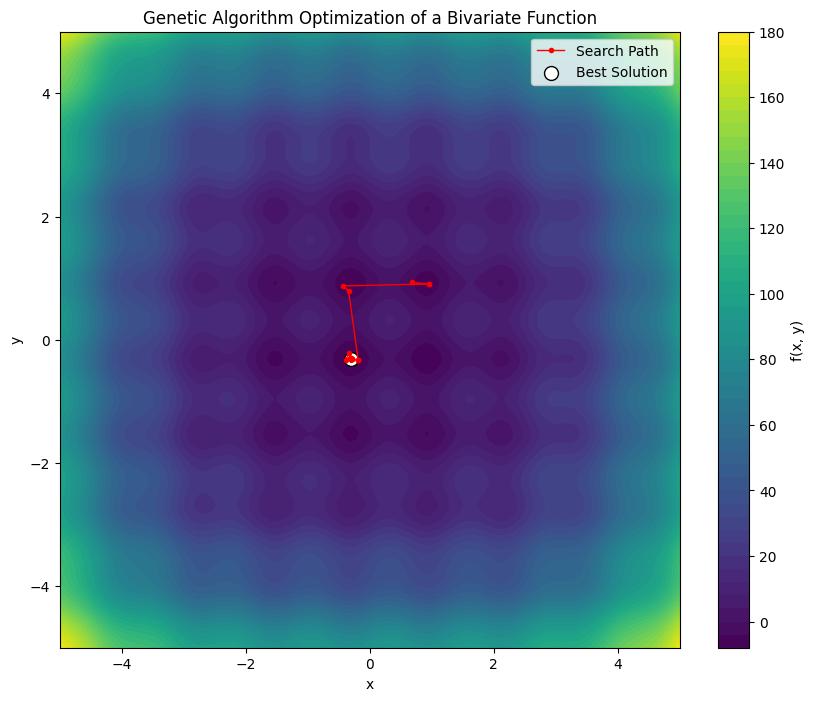

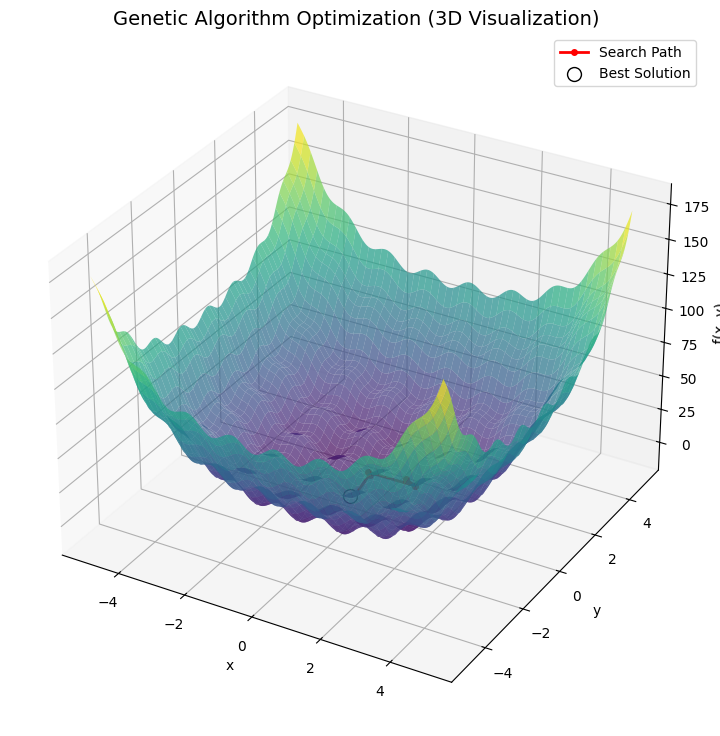

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 定义目标函数
def objective_function(individual):
    x, y = individual[0], individual[1]
    return x**2 + y**2 + 4 * np.sin(5 * x) + 4 * np.sin(5 * y) + 0.1 * (x**4 + y**4),

# 遗传算法参数设置
POPULATION_SIZE = 100    # 种群大小
GENERATIONS = 50         # 迭代代数
CROSSOVER_PROB = 0.7     # 交叉概率
MUTATION_PROB = 0.2      # 变异概率
BOUNDS = [-5, 5]         # 搜索范围（x 和 y 的范围相同）

# 定义适应度和个体
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # 最小化问题
creator.create("Individual", list, fitness=creator.FitnessMin)

# 初始化工具箱
toolbox = base.Toolbox()

# 生成单个基因（随机浮点数）
toolbox.register("attr_float", random.uniform, BOUNDS[0], BOUNDS[1])

# 生成二元个体 (x, y)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)

# 生成种群
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册适应度评估函数
toolbox.register("evaluate", objective_function)

# 注册选择、交叉和变异操作
toolbox.register("select", tools.selTournament, tournsize=3)  # 锦标赛选择
toolbox.register("mate", tools.cxBlend, alpha=0.5)            # 混合交叉
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # 高斯变异

# 创建初始种群
population = toolbox.population(n=POPULATION_SIZE)

# 记录每一代的最优解
best_solutions = []

# 运行遗传算法
for gen in range(GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB)
    
    # 评估适应度
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    # 选择下一代种群
    population = toolbox.select(offspring, k=len(population))
    
    # 记录当前最优解
    best_individual = tools.selBest(population, 1)[0]
    best_solutions.append((best_individual[0], best_individual[1], best_individual.fitness.values[0]))

# 获取最终最优解
final_best = tools.selBest(population, 1)[0]
print(f"optimal_solution: x = {final_best[0]}, y = {final_best[1]}, optimal_value: f(x, y) = {final_best.fitness.values[0]}")

# 可视化结果
x_vals = np.linspace(BOUNDS[0], BOUNDS[1], 400)
y_vals = np.linspace(BOUNDS[0], BOUNDS[1], 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y])[0]

# 绘制等高线图
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')

# 绘制搜索路径
search_x = [sol[0] for sol in best_solutions]
search_y = [sol[1] for sol in best_solutions]
plt.plot(search_x, search_y, color='red', marker='o', markersize=3, linewidth=1, label='Search Path')

# 标记最优解
plt.scatter(final_best[0], final_best[1], color='white', edgecolor='black', s=100, label='Best Solution')

# 添加标题和标签
plt.title('Genetic Algorithm Optimization of a Bivariate Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# 绘制 3D 可视化
x_vals = np.linspace(BOUNDS[0], BOUNDS[1], 400)
y_vals = np.linspace(BOUNDS[0], BOUNDS[1], 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y])[0]

# 创建 3D 图形
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制目标函数的 3D 曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# 绘制搜索路径
search_x = [sol[0] for sol in best_solutions]
search_y = [sol[1] for sol in best_solutions]
search_z = [sol[2] for sol in best_solutions]
ax.plot(search_x, search_y, search_z, color='red', marker='o', markersize=4, linewidth=2, label='Search Path')

# 标记最优解
ax.scatter(final_best[0], final_best[1], final_best.fitness.values[0],
           color='white', edgecolor='black', s=100, label='Best Solution')

# 设置标题和标签
ax.set_title('Genetic Algorithm Optimization (3D Visualization)', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()
